<font size="+3"><strong> Getting data from APIs</strong></font>

In [39]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3


from config import settings
import matplotlib.pyplot as plt
import pandas as pd
import requests



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The sql extension is already loaded. To reload it, use:
  %reload_ext sql


# Accessing APIs Through a URL

Extracting stock market information from the [AlphaVantage](https://alphavantage.co/) API. To get a sense of how an API works.

In [40]:
url = (
    "https://www.alphavantage.co/query?"
    "function=TIME_SERIES_DAILY&"
    "symbol=IBM&"
    "apikey=demo"
)

print("url type:", type(url))
url

url type: <class 'str'>


'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo'

In [41]:
# Import settings
from config import settings

# Use `dir` to list attributes
dir(settings)

['Config',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_update_forward_refs__',
 '__validators__',
 '_abc_impl',
 '_build_values',
 '_calculate_keys',
 '_copy_and_set_values',
 '_decompo

In [42]:
ticker = "AMBUJACEM.BSE"
output_size = "compact"
data_type = "json"

url = (
    "https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"
    "function=TIME_SERIES_DAILY&"
    f"symbol={ticker}&"
    f"outputsize={output_size}&"
    f"datatype={data_type}&"
    f"apikey={settings.alpha_api_key}"
)

print("url type:", type(url))
url

url type: <class 'str'>


'https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize=compact&datatype=json&apikey=5cf0f182131a90427441c2d78fb4f2d8de12e4ed81135c04e53fe97fada1a20405df3c69168cc4b7dfdcb473ed37560c7f2d114cb758a69e0f048213cb95851536d508d277704db76b2f3f5fa7d4cf87b295d70cff2b75d260da23160010e208841258fb8a89392a6ec5acaed9ff4c300b35ccb4135ae5ac909f8648f025843a'

# Accessing APIs Through a Request

We've seen how to access the AlphaVantage API by clicking on a URL, but this won't work for the application we're building in this project because only humans click URLs. Computer programs access APIs by making **requests**. Let's build our first request using the URL we created in the previous task. 

In [43]:
response = requests.get(url=url)

print("response type:", type(response))

response type: <class 'requests.models.Response'>


In [44]:
# Use `dir` on your `response`
dir(response)


['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [45]:
response_code = response.status_code

print("code type:", type(response_code))
response_code


code type: <class 'int'>


200

Translated to English, `200` means "OK". It's the standard response for a successful HTTP request. In other words, it worked! We successfully received data back from the AlphaVantage API. 

Now let's take a look at the `text`.

In [46]:
response_text = response.text

print("response_text type:", type(response_text))
print(response_text[:200])

response_text type: <class 'str'>
{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "AMBUJACEM.BSE",
        "3. Last Refreshed": "2024-03-14",
        "4. Output 


This string looks like the data we previously saw in our browser when we clicked on the URL in <a href="#task-815">Task 8.1.5</a>. But we can't work with data structured as JSON when it's a string. Instead, we need it in a dictionary.

In [47]:
response_data = response.json()

print("response_data type:", type(response_data))

response_data type: <class 'dict'>


Let's check to make sure that the data is structured in the same way we saw in our browser.

In [48]:
# Print `response_data` keys
list(response_data.keys())


['Meta Data', 'Time Series (Daily)']

Now let's look at data that's assigned to the `"Time Series (Daily)"` key.

In [49]:
# Extract `"Time Series (Daily)"` value from `response_data`
stock_data = response_data["Time Series (Daily)"]

print("stock_data type:", type(stock_data))

# Extract data for one of the days in `stock_data`

stock_data["2024-03-14"]

stock_data type: <class 'dict'>


{'1. open': '552.6500',
 '2. high': '584.8000',
 '3. low': '551.5000',
 '4. close': '582.4000',
 '5. volume': '119571'}

Now that we know how the data is organized when we extract it from the API, let's transform it into a DataFrame to make it more manageable.

In [50]:
df_ambuja = pd.DataFrame().from_dict(stock_data , orient="index" , dtype=float)

print("df_ambuja shape:", df_ambuja.shape)
print()
print(df_ambuja.info())
df_ambuja.head(10)

df_ambuja shape: (100, 5)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2024-03-14 to 2023-10-20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7+ KB
None


,1. open,2. high,3. low,4. close,5. volume
2024-03-14,552.65,584.80,551.50,582.40,119571.0
2024-03-13,587.15,590.50,551.05,559.80,148915.0
2024-03-12,603.45,605.10,584.00,586.65,111313.0
2024-03-11,603.75,612.50,600.05,602.20,149751.0
2024-03-07,598.00,606.50,596.80,603.30,56532.0
2024-03-06,612.15,613.20,595.75,598.00,161124.0
2024-03-05,621.60,624.55,611.00,613.20,117328.0
2024-03-04,619.55,621.15,612.50,617.20,124240.0
2024-03-01,609.85,620.25,607.00,617.60,210504.0
2024-02-29,589.00,609.00,583.50,606.55,172964.0


All in all, this looks pretty good, but there are a couple of problems: the data type of the dates, and the format of the headers. Let's fix the dates first. Right now, the dates are strings; in order to make the rest of our code work, we'll need to create a proper `DatetimeIndex`. 

In [51]:
# Convert `df_ambuja` index to `DatetimeIndex`
df_ambuja.index = pd.to_datetime(df_ambuja.index)

# Name index "date"
df_ambuja.index.name = "date"

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-03-14 to 2023-10-20
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-03-14,552.65,584.8,551.50,582.40,119571.0
2024-03-13,587.15,590.5,551.05,559.80,148915.0
2024-03-12,603.45,605.1,584.00,586.65,111313.0
2024-03-11,603.75,612.5,600.05,602.20,149751.0
2024-03-07,598.00,606.5,596.80,603.30,56532.0


In [52]:
# Remove numbering from `df_ambuja` column names
df_ambuja.columns = [c[3:] for c in df_ambuja.columns]

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-03-14 to 2023-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,open,high,low,close,volume
date,,,,,
2024-03-14,552.65,584.8,551.50,582.40,119571.0
2024-03-13,587.15,590.5,551.05,559.80,148915.0
2024-03-12,603.45,605.1,584.00,586.65,111313.0
2024-03-11,603.75,612.5,600.05,602.20,149751.0
2024-03-07,598.00,606.5,596.80,603.30,56532.0


In [53]:
def get_daily(ticker = "AMBUJACEM.BSE", output_size = "compact", data_type = "json"):

    """Get daily time series of an equity from AlphaVantage API.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the equity.
    output_size : str, optional
        Number of observations to retrieve. "compact" returns the
        latest 100 observations. "full" returns all observations for
        equity. By default "full".

    Returns
    -------
    pd.DataFrame
        Columns are 'open', 'high', 'low', 'close', and 'volume'.
        All are numeric.
    """
    # Create URL (8.1.5)

    url = (
        "https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?"
        "function=TIME_SERIES_DAILY&"
        f"symbol={ticker}&"
        f"outputsize={output_size}&"
        f"datatype={data_type}&"
        f"apikey={settings.alpha_api_key}"
    )

    # Send request to API (8.1.6)

    response = requests.get(url=url)

    # Extract JSON data from response (8.1.10)
    response_data = response.json()
    
    if "Time Series (Daily)" not in response_data.keys():
        raise Exception(
            f"Invalide API call. check that '{ticker}' is correct."
        )
    
    
    # Read data into DataFrame (8.1.12 & 8.1.13)
    stock_data = response_data["Time Series (Daily)"]
    df = pd.DataFrame().from_dict(stock_data , orient="index" , dtype=float)
    
    # Convert index to `DatetimeIndex` named "date" (8.1.14)
    df.index = pd.to_datetime(df.index)

    # Name index "date"
    df.index.name = "date"

    # Remove numbering from columns (8.1.15)
    df.columns = [c[3:] for c in df.columns]

    # Return DataFrame
    return df

In [54]:
# Test your function
df_ambuja = get_daily(ticker="AMBUJACEM.BSE")

print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2024-03-14 to 2023-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,open,high,low,close,volume
date,,,,,
2024-03-14,552.65,584.8,551.50,582.40,119571.0
2024-03-13,587.15,590.5,551.05,559.80,148915.0
2024-03-12,603.45,605.1,584.00,586.65,111313.0
2024-03-11,603.75,612.5,600.05,602.20,149751.0
2024-03-07,598.00,606.5,596.80,603.30,56532.0


In [55]:
df_ambuja.tail()

,open,high,low,close,volume
date,,,,,
2023-10-27,416.40,423.95,415.50,417.50,45753.0
2023-10-26,415.00,422.00,408.00,415.70,47088.0
2023-10-25,418.75,422.70,414.00,417.70,50400.0
2023-10-23,430.90,432.55,411.25,415.75,135899.0
2023-10-20,437.30,439.30,428.40,430.85,39520.0


In [56]:
%sql sqlite:////home/jumaa/PROJECT/Python/080volatility-forecasting-in-india/stock.sqlite

'Connected: @/home/jumaa/PROJECT/Python/080volatility-forecasting-in-india/stock.sqlite'

In [57]:
%%sql
CREATE TABLE stock_data (id integer primary key AUTOINCREMENT ,date date not null, open float, high float, low float, close float, volume float)



 * sqlite:////home/jumaa/PROJECT/Python/080volatility-forecasting-in-india/stock.sqlite
(sqlite3.OperationalError) table stock_data already exists
[SQL: CREATE TABLE stock_data (id integer primary key AUTOINCREMENT ,date date not null, open float, high float, low float, close float, volume float)]
(Background on this error at: https://sqlalche.me/e/14/e3q8)


In [58]:
%%sql
SELECT *
FROM stock_data
LIMIT 5

 * sqlite:////home/jumaa/PROJECT/Python/080volatility-forecasting-in-india/stock.sqlite
Done.


date,open,high,low,close,volume
2024-03-14 00:00:00,552.65,584.8,551.5,582.4,119571.0
2024-03-13 00:00:00,587.15,590.5,551.05,559.8,148915.0
2024-03-12 00:00:00,603.45,605.1,584.0,586.65,111313.0
2024-03-11 00:00:00,603.75,612.5,600.05,602.2,149751.0
2024-03-07 00:00:00,598.0,606.5,596.8,603.3,56532.0


In [59]:
db = "stock.sqlite"
connection = sqlite3.connect(database=db , check_same_thread=False)

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


In [60]:

n_inserted = df_ambuja.to_sql(name="stock_data" , con=connection , if_exists="replace")
print("transaction_successful",True)
print("records_inserted", n_inserted)


transaction_successful True
records_inserted 100


In [61]:
%%sql
SELECT *
FROM stock_data
LIMIT 5

 * sqlite:////home/jumaa/PROJECT/Python/080volatility-forecasting-in-india/stock.sqlite
Done.


date,open,high,low,close,volume
2024-03-14 00:00:00,552.65,584.8,551.5,582.4,119571.0
2024-03-13 00:00:00,587.15,590.5,551.05,559.8,148915.0
2024-03-12 00:00:00,603.45,605.1,584.0,586.65,111313.0
2024-03-11 00:00:00,603.75,612.5,600.05,602.2,149751.0
2024-03-07 00:00:00,598.0,606.5,596.8,603.3,56532.0


# Building Our Data Module

## AlphaVantage API Class

In [62]:
# Import `AlphaVantageAPI`
from data import AlphaVantageAPI

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'data.AlphaVantageAPI'>


In [63]:
# Define Suzlon ticker symbol
ticker = "IBM"

# Use your `av` object to get daily data
df_ibm = av.get_daily(ticker=ticker)

print("df_ibm type:", type(df_ibm))
print("df_ibm shape:", df_ibm.shape)
df_ibm.head()

df_ibm type: <class 'pandas.core.frame.DataFrame'>
df_ibm shape: (6131, 5)


,open,high,low,close,volume
date,,,,,
2024-03-14,196.95,197.748,192.12,193.43,4102201.0
2024-03-13,197.55,198.100,195.32,196.70,3960737.0
2024-03-12,192.46,199.180,192.15,197.78,5862512.0
2024-03-11,195.09,195.380,190.88,191.73,4712688.0
2024-03-08,196.06,197.770,194.38,195.95,3943113.0


Okay! The next thing we need to do is test our new method to make sure it works the way we want it to. Usually, these sorts of tests are written *before* writing the method, but, in this first case, we'll do it the other way around in order to get a better sense of how assert statements work.

In [64]:
# Does `get_daily` return a DataFrame?
assert isinstance(df_ibm , pd.DataFrame), "Output must be DataFrame"

# Does DataFrame have 5 columns?
assert (len(df_ibm.columns) == 5), "DataFrame must be contains 5 columns only"

# Does DataFrame have a DatetimeIndex?
assert isinstance(df_ibm.index, pd.DatetimeIndex) , "DataFrame index must be datetime"


# Is the index name "date"?
assert (df_ibm.index.name == "date") , "DataFrame index must be datetime"

# Does Datcolumnshave correct column names?
assert all(df_ibm.columns == ['open', 'high', 'low', 'close', 'volume']), "DataFrame names are incorrect"

# Are columns correct data type?
assert all(df_ibm.dtypes == float) , "DataFrame columns must be float type"

In [65]:
# Import class definition
from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection=connection)

# Does `repo` have a "connection" attribute?
assert hasattr(repo , "connection")

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection , sqlite3.Connection)

In [66]:
response = repo.insert_table(table_name=ticker, records=df_ibm, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [67]:
sql = "SELECT * FROM 'IBM' "
df_ibm_test = pd.read_sql(sql=sql , con=connection , parse_dates=["date"] , index_col="date")

print("df_ibm_test type:", type(df_ibm_test))
print()
print(df_ibm_test.info())
df_ibm_test.head()

df_ibm_test type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6131 entries, 2024-03-14 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6131 non-null   float64
 1   high    6131 non-null   float64
 2   low     6131 non-null   float64
 3   close   6131 non-null   float64
 4   volume  6131 non-null   float64
dtypes: float64(5)
memory usage: 287.4 KB
None


,open,high,low,close,volume
date,,,,,
2024-03-14,196.95,197.748,192.12,193.43,4102201.0
2024-03-13,197.55,198.100,195.32,196.70,3960737.0
2024-03-12,192.46,199.180,192.15,197.78,5862512.0
2024-03-11,195.09,195.380,190.88,191.73,4712688.0
2024-03-08,196.06,197.770,194.38,195.95,3943113.0


In [68]:
df_ibm = repo.read_table(table_name=ticker, limit=2500)
# Is `df_ibm` a DataFrame?
assert isinstance(df_ibm , pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_ibm.index , pd.DatetimeIndex)

# Is the index named "date"?
assert df_ibm.index.name == "date"

# Does it have 2,500 rows and 5 columns?
assert df_ibm.shape == (2500,5)

# Are the column names correct?
assert df_ibm.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_ibm.dtypes == float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_ibm.shape)
print()
print(df_ibm.info())
df_ibm.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2024-03-14 to 2014-04-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2024-03-14,196.95,197.748,192.12,193.43,4102201.0
2024-03-13,197.55,198.100,195.32,196.70,3960737.0
2024-03-12,192.46,199.180,192.15,197.78,5862512.0
2024-03-11,195.09,195.380,190.88,191.73,4712688.0
2024-03-08,196.06,197.770,194.38,195.95,3943113.0


# Comparing Stock Returns

In [69]:
ticker = "AMBUJACEM.BSE"

# Get Ambuja data using `av`
ambuja_records = av.get_daily(ticker=ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(table_name=ticker , records=ambuja_records , if_exists="replace")

response

{'transaction_successful': True, 'records_inserted': 4732}

Use the instances of the `AlphaVantageAPI` and `SQLRepository` classes you created in this lesson (`av` and `repo`, respectively) to get the stock data for Ambuja Cement and read it into the database.

In [70]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker , limit=2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2024-03-14,552.65,584.8,551.50,582.40,119571.0
2024-03-13,587.15,590.5,551.05,559.80,148915.0
2024-03-12,603.45,605.1,584.00,586.65,111313.0
2024-03-11,603.75,612.5,600.05,602.20,149751.0
2024-03-07,598.00,606.5,596.80,603.30,56532.0


Using the `read_table` method you've added to your `SQLRepository`, extract the most recent 2,500 rows of data for Ambuja Cement from the database and assign the result to `df_ambuja`.

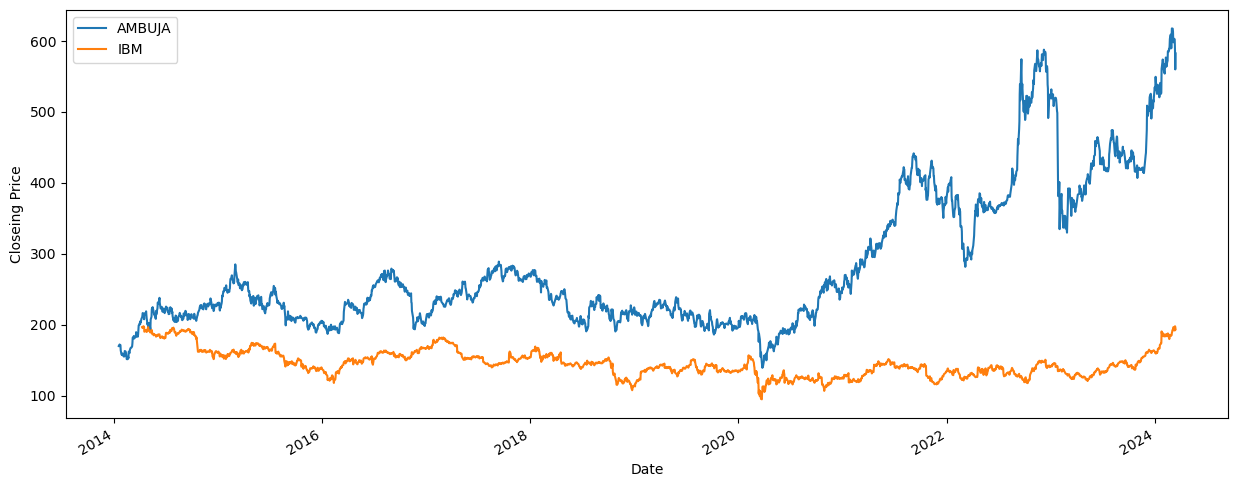

In [71]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_suzlon` and `df_ambuja`
df_ambuja["close"].plot(ax=ax , label="AMBUJA")
df_ibm["close"].plot(ax=ax , label="IBM")


# Label axes
plt.xlabel("Date")
plt.ylabel("Closeing Price")


# Add legend
plt.legend();